# Emotion Recognition by Textual Tweets Classification Using 7 algo's including Voting Classifier (LR-SGD)



Importing the necessary packages


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file 
df=pd.read_excel('E:\original_data_set.xlsx')

Understanding the imported Data set File

In [3]:
#Reading the top 5 rows of the data frame
df.head()

,Tweet_extrction_time_index,Emotion,Twitter_body_text
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
#reading the bottom 5 rows of the data frame
df.tail()

,Tweet_extrction_time_index,Emotion,Twitter_body_text
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [5]:
#understanding the no. of rows and columns of Data Frame
df.shape

(99989, 3)

In [6]:
#Listing all the columns of the data frame
df.columns.tolist()

['Tweet_extrction_time_index', 'Emotion', 'Twitter_body_text']

In [7]:
#Understanding the Columns data Types
df.dtypes

Tweet_extrction_time_index     int64
Emotion                        int64
Twitter_body_text             object
dtype: object

In [8]:
list_y=[]
list_y.append(int(df.Emotion.value_counts()[1]))
list_y.append(int(df.Emotion.value_counts()[0]))
print(list_y)

[56457, 43532]


# Pre-Data Visualization

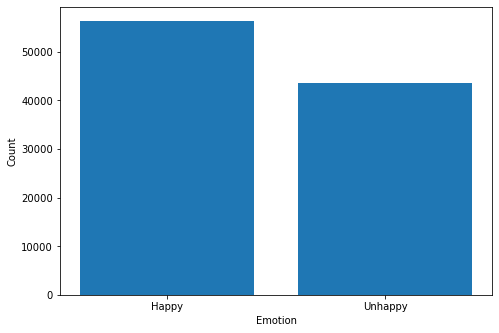

In [9]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
list_x=['Happy','Unhappy']
list_y=[]
list_y.append(int(df.Emotion.value_counts()[1]))
list_y.append(int(df.Emotion.value_counts()[0]))
ax.bar(list_x,list_y)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Data Preprocessing

In [10]:
#importing the necessary packages
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import re

(1)Removing the unnecessary characters
- helps us in removal of Un-necessary things like emojis's, differnet languages , symbols and stuff
     

In [11]:
clean_1=[]
for each_row in range(df.shape[0]):
    text=df['Twitter_body_text'].values[each_row]
    tempo=str(text)
    tempe=re.sub('[^A-Za-z0-9!?]', ' ', tempo)
    clean_1.append(tempe)
df["cleaned_1"]=clean_1

In [12]:
df[['cleaned_1']]

,cleaned_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


(2)Removing the punctuation and Numbers
- as they don't have anything to do with determining the emotion

In [13]:
clean_2=[]
for each_row in range(df.shape[0]):
    text=df['cleaned_1'].values[each_row]
    tempo_c1=str(text)
    tempe_c1=re.sub('[^A-Za-z]', ' ', tempo_c1)
    clean_2.append(tempe_c1)
df["cleaned_2"]=clean_2

In [14]:
df[['cleaned_2']]

,cleaned_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


(3) Converting the cleaned_2 description of tweets in to lower case
- basically making sure that the text doesn't consists of any upper case letters

In [15]:
clean_3=[]
for each_row in range(df.shape[0]):
    text=df['cleaned_2'].values[each_row]
    tempo_c2=str(text)
    tempe_c2=tempo_c2.lower()
    clean_3.append(tempe_c2)
df["cleaned_3"]=clean_3

In [16]:
df[['cleaned_3']]

,cleaned_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


(4). Tokenizing and Removing the stop words

In [17]:
#importing necessary packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [18]:
#tokenizing and remocving stop words
mlist=[]
for each_row in range(df.shape[0]):
    text=df['cleaned_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    mlist.append(dre)
df['cleaned_4']=mlist
        

In [19]:
df[['cleaned_4']]

,cleaned_4
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweets time se...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


(5). converting all the words in to their root words using either lemmatizer/stemmer

In [20]:
#importing the necessary_packages
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [21]:
clean_5=[]
for each_row in range(df.shape[0]):
    text=df['cleaned_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    clean_5.append(dre)
df['cleaned_5']=clean_5

In [22]:
df[['cleaned_5']]

,cleaned_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


(6)Dropping the null value row's if any present 

In [23]:
df=df[df['cleaned_5']!='']

In [24]:
#checking shape after removing
df.shape

(99957, 8)

* Forming the new_data set with the finally cleaned tweets and emotion for simplification of usage

In [25]:
per=list()
per=df['cleaned_5'].to_list()
df_2 = pd.DataFrame()
df_2['Final_clean_Tweets_text']=per
df_2['Sentiment']=df['Emotion'].to_list()


In [26]:
df_2

,Final_clean_Tweets_text,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99952,cupcake seems like repeating problem hope able...,0
99953,cupcake arrrr replied different tweet time see...,1
99954,cupcake ya thought,0
99955,cupcake dollie yes yes glad fun,1


# Converting in to a Vector_matrix_form using TF_IDF

In [27]:
#importing the necessary package's
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()

In [28]:
transformed_matrix=tf_idf.fit_transform(df_2['Final_clean_Tweets_text'])
print(transformed_matrix.shape)

(99957, 92221)


verifying the Sentiment Column Data type before proceeding further

In [29]:
df_2['Sentiment'].dtypes

dtype('int64')

Splitting the data for modelling

In [30]:
#importing the necessary packages
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(transformed_matrix,df_2['Sentiment'],test_size=0.30,train_size=0.70)

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((69969, 92221), (69969,), (29988, 92221), (29988,))

# Applying Algorithms

#  Random Forest Classifier

Training data 

In [33]:
#importing the necessary packages
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [34]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

Testing the Data

In [107]:
y_pred_1=rfc.predict(x_test)

Importing the performance metrics

In [40]:
#importing the necessary packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [109]:
rf1=accuracy_score(y_pred_1,y_test)
rf2=precision_score(y_pred_1,y_test)
rf3=recall_score(y_pred_1,y_test)
rf4=f1_score(y_pred_1,y_test)

In [110]:
print(rf1,rf2,rf3,rf4)

0.73062558356676 0.7973638900433414 0.7421939762365294 0.7687904287595169


# SVM

Training

In [111]:
#importing the necessary packages
from sklearn.svm import SVC
svc=SVC()

In [112]:
svc.fit(x_train,y_train)

SVC()

Testing

In [113]:
y_pred_2=svc.predict(x_test)

Calculating Performance Metrics

In [114]:
sv1=accuracy_score(y_pred_2,y_test)
sv2=precision_score(y_pred_2,y_test)
sv3=recall_score(y_pred_2,y_test)
sv4=f1_score(y_pred_2,y_test)

In [115]:
print(sv1,sv2,sv3,sv4)

0.751734026944111 0.8509766668645729 0.7438758563421216 0.7938301348619535


# Naive Bayes

Training

In [116]:
#importing the necessary packages
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [ ]:
nb.fit(x_train,y_train)

Testing

In [ ]:
y_pred_3=nb.predict(x_test)

Calculating Performance Metrics

In [ ]:
nb1=accuracy_score(y_pred_3,y_test)
nb2=precision_score(y_pred_3,y_test)
nb3=recall_score(y_pred_3,y_test)
nb4=f1_score(y_pred_3,y_test)

In [ ]:
print(nb1,nb2,nb3,nb4)

# Gradient Boosting Machine

Training

In [ ]:
#importing the necessary packages
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

Testing

In [ ]:
y_pred_4=gbc.predict(x_test)

Calculating Performance Metrics

In [ ]:
gbc1=accuracy_score(y_pred_4,y_test)
gbc2=precision_score(y_pred_4,y_test)
gbc3=recall_score(y_pred_4,y_test)
gbc4=f1_score(y_pred_4,y_test)

In [ ]:
print(gbc1,gbc2,gbc3,gbc4)

# Logistic Regression 

Training

In [36]:
#importing the necessary packages
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [37]:
lrc.fit(x_train,y_train)

C:\Users\madir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing

In [41]:
y_pred_5=lrc.predict(x_test)

Calculating Performance Metrics

In [42]:
lrc1=accuracy_score(y_pred_5,y_test)
lrc2=precision_score(y_pred_5,y_test)
lrc3=recall_score(y_pred_5,y_test)
lrc4=f1_score(y_pred_5,y_test)

In [45]:
print(lrc1,lrc2,lrc3,lrc4)

0.7504001600640257 0.8367648798958703 0.7495362764322434 0.7907522853708311


# Stochastic Gradient Descent

Training

In [99]:
#importing the necessary packages
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")

In [100]:
sgd.fit(x_train,y_train)

SGDClassifier(loss='log')

Testing

In [101]:
y_pred_6=sgd.predict(x_test)

Calculating Performance Metrics

In [102]:
sgd1=accuracy_score(y_pred_6,y_test)
sgd2=precision_score(y_pred_6,y_test)
sgd3=recall_score(y_pred_6,y_test)
sgd4=f1_score(y_pred_6,y_test)

In [103]:
print(sgd1,sgd2,sgd3,sgd4)

0.737328264639189 0.8649272275470359 0.7232474150299313 0.7877677488885896


In [120]:
print(type(y_pred_6))

<class 'numpy.ndarray'>


# Voting Classifier

Logistic_Regression Probability Finder

In [129]:
y_pred_7_list=[]
for each_record in x_test:
    probi1=lrc.predict_proba(each_record)
    probi2=sgd.predict_proba(each_record)
    lr_sgd_neg=(probi1[0][0])+(probi2[0][0])/2
    lr_sgd_pos=(probi1[0][1])+(probi2[0][1])/2
    if(lr_sgd_neg>lr_sgd_pos):
        y_pred_7_list.append(0)
    else:
        y_pred_7_list.append(1)
y_pred_7= np.array(y_pred_7_list)
print(y_pred_7)

[0 1 1 ... 1 1 1]


Calculating Performance Metrics

In [131]:
vc1=accuracy_score(y_pred_7,y_test)
vc2=precision_score(y_pred_7,y_test)
vc3=recall_score(y_pred_7,y_test)
vc4=f1_score(y_pred_7,y_test)

In [132]:
print(vc1,vc2,vc3,vc4)

0.7486994797919168 0.8441604543840966 0.7442879499217527 0.791084497671324
